In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
df=pd.read_csv('./DSBDALExam DataSets/Adult/adult.csv',names=columns)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**a. Histogram**
Objective: Understand the distribution of the age of individuals.

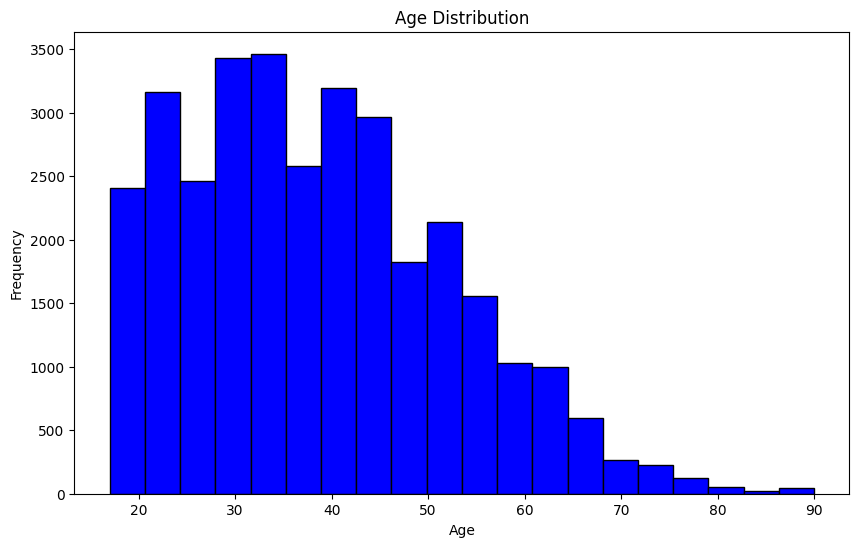

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['age'],bins=20,color='blue',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**b.dot plot**
Objective: Visualize the frequency of education categories in a simple form.

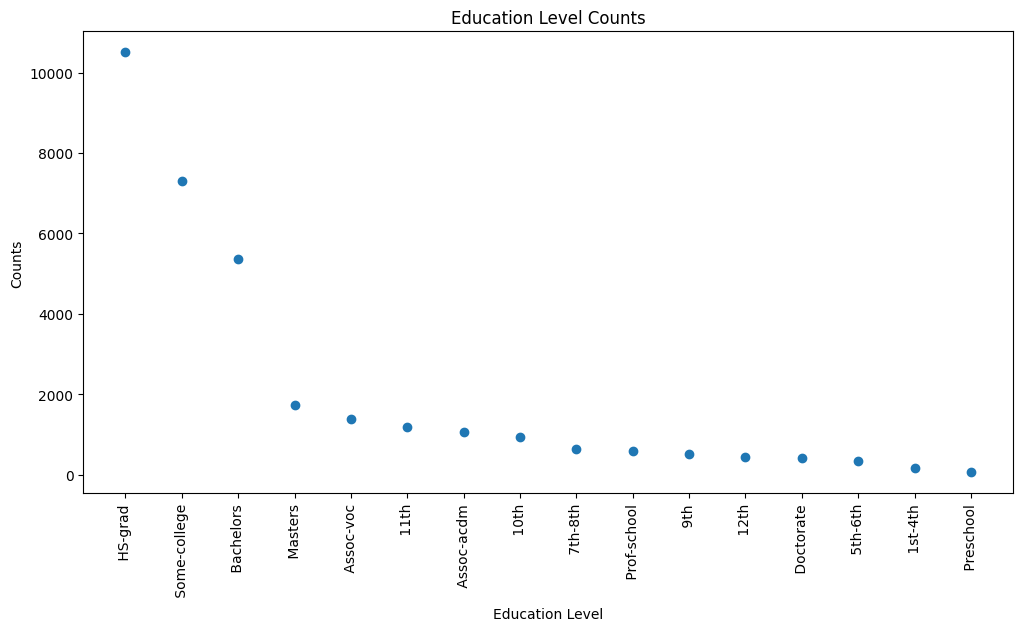

In [ ]:
edu_counts=df['education'].value_counts()
plt.figure(figsize=(12,6))
plt.plot(edu_counts.values,'o')
plt.xticks(ticks=range(len(edu_counts)), labels=edu_counts.index, rotation=90)
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.show()

**c. Bar Plot**
Objective: Compare the number of males vs females in the dataset.

C:\Users\kunjc\AppData\Local\Temp\ipykernel_19584\1846950859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


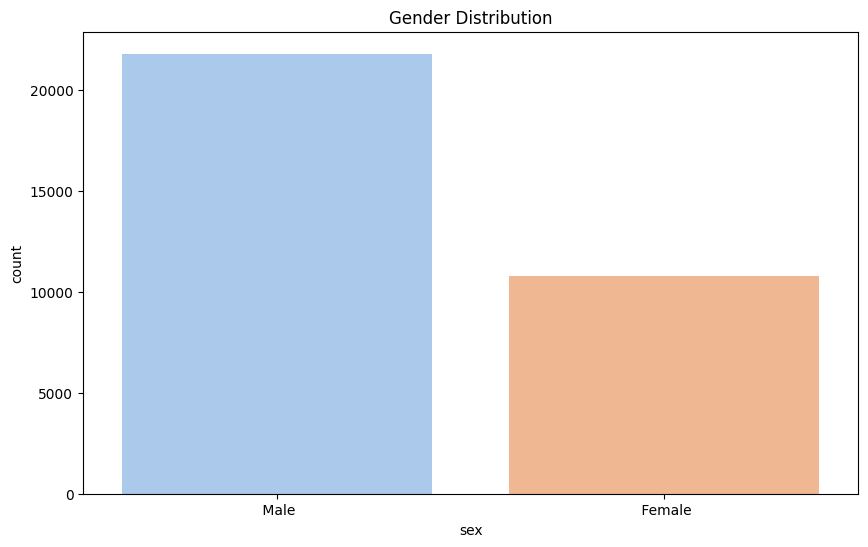

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

**d. Line Chart**
Objective: Show average working hours by age group.

C:\Users\kunjc\AppData\Local\Temp\ipykernel_19584\3046442483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_data = df.groupby('age_group')['hours_per_week'].mean()


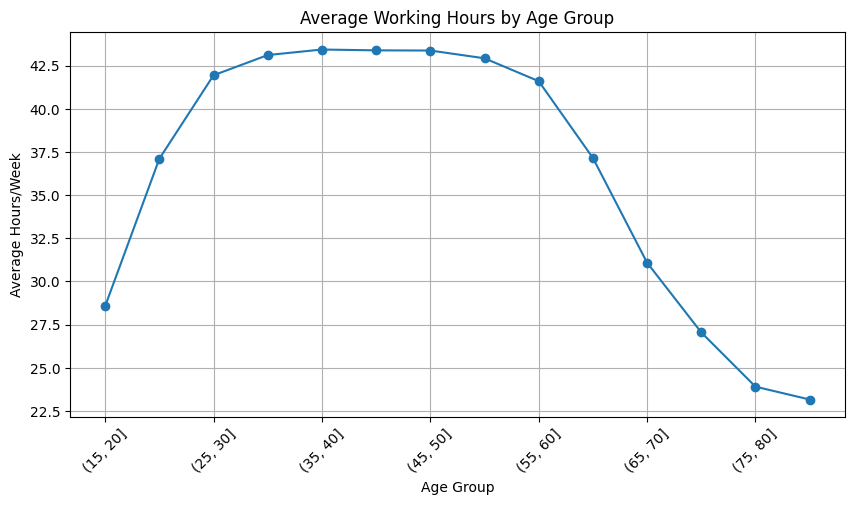

In [23]:
df['age_group'] = pd.cut(df['age'], bins=range(15, 90, 5))
line_data = df.groupby('age_group')['hours_per_week'].mean()

plt.figure(figsize=(10, 5))
line_data.plot(marker='o')
plt.title('Average Working Hours by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours/Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**e. Pie Chart**
Objective: Show the proportion of income levels.

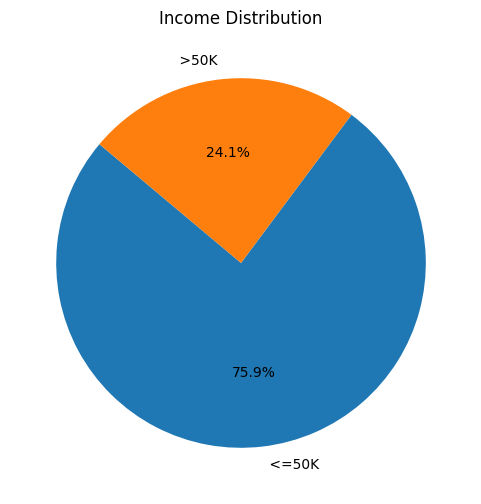

In [21]:
income_counts = df['income'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution')
plt.show()


**f. Box Plot**
Objective: Identify outliers and distribution in hours-per-week.

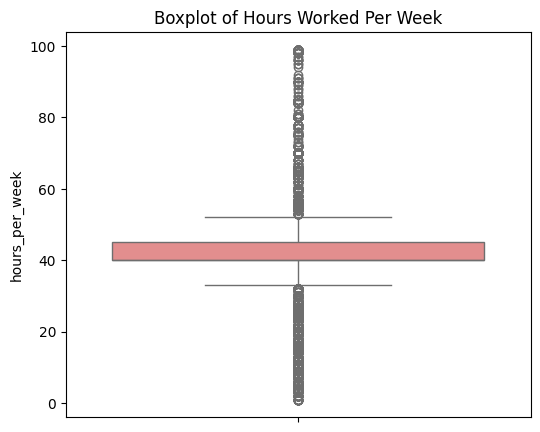

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y='hours_per_week', data=df, color='lightcoral')
plt.title('Boxplot of Hours Worked Per Week')
plt.show()

**g. Scatter Plot**
Objective: Analyze relationship between age and hours-per-week.

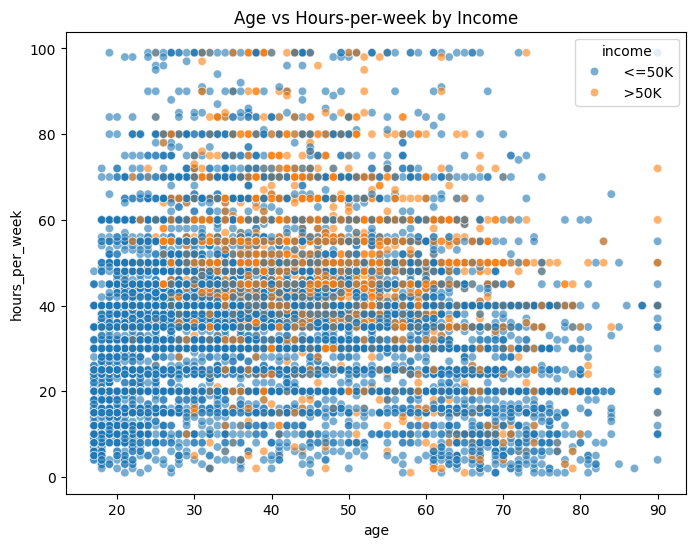

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours_per_week', data=df, hue='income', alpha=0.6)
plt.title('Age vs Hours-per-week by Income')
plt.show()

**g. Scatter Plot**
Explore relationship between capital-gain and capital-loss

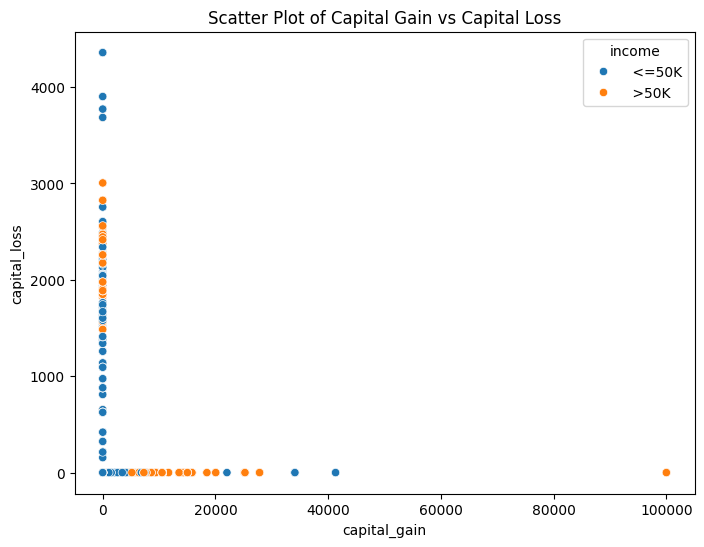

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='capital_gain', y='capital_loss', hue='income', data=df)
plt.title('Scatter Plot of Capital Gain vs Capital Loss')
plt.show()

**h. Add Boxplots to a Scatterplot**
Objective: Combine distribution and relationship of age and hours-per-week.

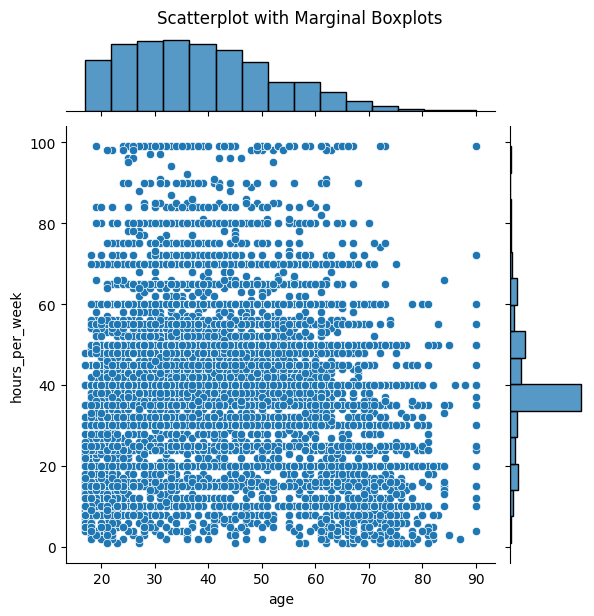

In [35]:
sns.jointplot(x='age', y='hours_per_week', data=df, kind='scatter', marginal_kws=dict(bins=15, fill=True))
plt.suptitle("Scatterplot with Marginal Boxplots", y=1.02)
plt.show()

Combine histogram, scatter, and boxplot to explore age distribution by income

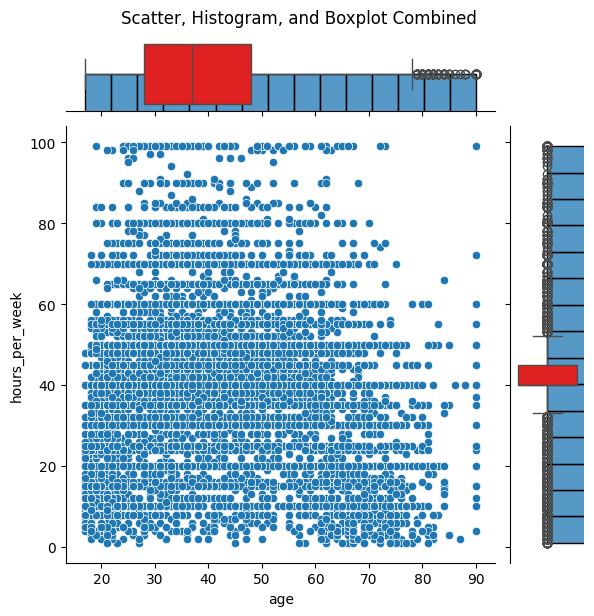

In [ ]:
g = sns.jointplot(data=df, x="age", y="hours_per_week", kind="scatter", marginal_kws=dict(bins=15, fill=True))

# Overlay boxplots on top margins (no alpha)
g.plot_marginals(sns.boxplot, color="red")

plt.suptitle("Scatter, Histogram, and Boxplot Combined", y=1.02)
plt.show()